In [1]:
import pandas as pd
import numpy as np
import unicodedata
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
PGJ_input=pd.read_csv("Carpetas de Investigación PGJ CDMX.csv",sep=";")
PGJ_input.head()

,año_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalía,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,Geopoint
0,2017.0,Junio,2017-06-19 10:00:00,ROBO A NEGOCIO SIN VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-8,UI-1SD,BUENOS AIRES,CUAUHTEMOC,2017-06-19 13:46:37,Junio,2017,EJE 3 SUR,DOCTOR QUIROGA,-99.145673,19.406269,"19.406269303, -99.1456727623"
1,2016.0,Noviembre,2016-11-15 12:00:00,DESPOJO,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-4,UI-1SD,CUAUHTÉMOC,CUAUHTEMOC,2017-06-19 13:48:22,Junio,2017,AVENIDA PASEO DE LA REFORMA,NaN,-99.162689,19.429468,"19.4294676006, -99.1626885107"
2,2017.0,Junio,2017-06-19 05:00:00,ROBO A PASAJERO / CONDUCTOR DE TAXI CON VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN TLALPAN,TLP-2,UI-1CD,MESA DE LOS HORNOS,TLALPAN,2017-06-19 13:52:15,Junio,2017,AHUACTEPEC,NaN,-99.184597,19.278135,"19.2781350645, -99.1845967763"
3,2017.0,Junio,2017-06-19 06:00:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,INVESTIGACIÓN EN MIGUEL HIDALGO,MH-4,UI-1SD,TACUBAYA,MIGUEL HIDALGO,2017-06-19 13:58:31,Junio,2017,AV. JALISCO,ANILLO PERIFERICO,-99.189690,19.398010,"19.3980098652, -99.1896899072"
4,2017.0,Marzo,2017-03-13 12:00:00,ABUSO DE CONFIANZA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN XOCHIMILCO,XO-2,UI-1SD,SAN MARCOS NORTE,XOCHIMILCO,2017-06-19 14:11:16,Junio,2017,GUADALUPE I. RAMÍREZ,PROLONGACIÓN GUADALUPE I. RAMÍREZ,-99.114178,19.265863,"19.2658632688, -99.1141782469"


In [3]:
Alcaldias_input=pd.read_csv("Alcaldías.csv",sep=";")
Alcaldias_input

,NOMBRE,CLAVE_MUNICIPAL,CVE_ENTIDAD,CVEGEO,Geo Point,Geo Shape
0,Tlalpan,12,9,9012,"19.1983396763, -99.2062207957","{""type"": ""Polygon"", ""coordinates"": [[[-99.1962..."
1,Tláhuac,11,9,9011,"19.2769983772, -99.0028216137","{""type"": ""Polygon"", ""coordinates"": [[[-98.9789..."
2,Venustiano Carranza,17,9,9017,"19.4304954545, -99.0931057959","{""type"": ""Polygon"", ""coordinates"": [[[-99.1089..."
3,Cuauhtémoc,15,9,9015,"19.4313734294, -99.1490557562","{""type"": ""Polygon"", ""coordinates"": [[[-99.1291..."
4,Iztapalapa,7,9,9007,"19.3491663204, -99.0567989642","{""type"": ""Polygon"", ""coordinates"": [[[-99.0581..."
5,Azcapotzalco,2,9,9002,"19.4853286147, -99.1821069423","{""type"": ""Polygon"", ""coordinates"": [[[-99.1823..."
6,Benito Juárez,14,9,9014,"19.3806424162, -99.1611346584","{""type"": ""Polygon"", ""coordinates"": [[[-99.1367..."
7,Cuajimalpa de Morelos,4,9,9004,"19.3246343001, -99.3107285253","{""type"": ""Polygon"", ""coordinates"": [[[-99.2569..."
8,Iztacalco,6,9,9006,"19.396911897, -99.094329797","{""type"": ""Polygon"", ""coordinates"": [[[-99.0558..."
9,Gustavo A. Madero,5,9,9005,"19.5040652077, -99.1158642087","{""type"": ""Polygon"", ""coordinates"": [[[-99.1185..."


In [4]:
PGJ_input["categoria_delito"].unique()

array(['DELITO DE BAJO IMPACTO',
       'ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA',
       'ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA',
       'ROBO A NEGOCIO CON VIOLENCIA', 'HECHO NO DELICTIVO',
       'ROBO A REPARTIDOR CON Y SIN VIOLENCIA',
       'ROBO DE VEHÍCULO CON Y SIN VIOLENCIA', 'HOMICIDIO DOLOSO',
       'LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO',
       'ROBO A CASA HABITACIÓN CON VIOLENCIA',
       'ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA',
       'ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA', 'VIOLACIÓN',
       'ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA',
       'ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA', 'SECUESTRO'],
      dtype=object)

In [5]:
alcaldias=Alcaldias_input["NOMBRE"]
alcaldias=alcaldias.str.replace("Á","A")
alcaldias=alcaldias.str.replace("á","a")
alcaldias=alcaldias.str.replace("É","E")
alcaldias=alcaldias.str.replace("é","e")
alcaldias=alcaldias.str.replace("Í","I")
alcaldias=alcaldias.str.replace("í","i")
alcaldias=alcaldias.str.replace("Ó","O")
alcaldias=alcaldias.str.replace("ó","o")
alcaldias=alcaldias.str.replace("Ú","u")
alcaldias=alcaldias.str.replace("ú","u")
alcaldias=alcaldias.str.replace(".","")
alcaldias = [alcaldia.upper() for alcaldia in alcaldias]
alcaldias

['TLALPAN',
 'TLAHUAC',
 'VENUSTIANO CARRANZA',
 'CUAUHTEMOC',
 'IZTAPALAPA',
 'AZCAPOTZALCO',
 'BENITO JUAREZ',
 'CUAJIMALPA DE MORELOS',
 'IZTACALCO',
 'GUSTAVO A MADERO',
 'MIGUEL HIDALGO',
 'LA MAGDALENA CONTRERAS',
 'COYOACAN',
 'MILPA ALTA',
 'ALVARO OBREGON',
 'XOCHIMILCO']

In [6]:
PGJ_alcaldias=PGJ_input.loc[PGJ_input["alcaldia_hechos"].isin(alcaldias),:]
PGJ_alcaldias

,año_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalía,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,Geopoint
0,2017.0,Junio,2017-06-19 10:00:00,ROBO A NEGOCIO SIN VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-8,UI-1SD,BUENOS AIRES,CUAUHTEMOC,2017-06-19 13:46:37,Junio,2017,EJE 3 SUR,DOCTOR QUIROGA,-99.145673,19.406269,"19.406269303, -99.1456727623"
1,2016.0,Noviembre,2016-11-15 12:00:00,DESPOJO,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-4,UI-1SD,CUAUHTÉMOC,CUAUHTEMOC,2017-06-19 13:48:22,Junio,2017,AVENIDA PASEO DE LA REFORMA,NaN,-99.162689,19.429468,"19.4294676006, -99.1626885107"
2,2017.0,Junio,2017-06-19 05:00:00,ROBO A PASAJERO / CONDUCTOR DE TAXI CON VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN TLALPAN,TLP-2,UI-1CD,MESA DE LOS HORNOS,TLALPAN,2017-06-19 13:52:15,Junio,2017,AHUACTEPEC,NaN,-99.184597,19.278135,"19.2781350645, -99.1845967763"
3,2017.0,Junio,2017-06-19 06:00:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,INVESTIGACIÓN EN MIGUEL HIDALGO,MH-4,UI-1SD,TACUBAYA,MIGUEL HIDALGO,2017-06-19 13:58:31,Junio,2017,AV. JALISCO,ANILLO PERIFERICO,-99.189690,19.398010,"19.3980098652, -99.1896899072"
4,2017.0,Marzo,2017-03-13 12:00:00,ABUSO DE CONFIANZA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN XOCHIMILCO,XO-2,UI-1SD,SAN MARCOS NORTE,XOCHIMILCO,2017-06-19 14:11:16,Junio,2017,GUADALUPE I. RAMÍREZ,PROLONGACIÓN GUADALUPE I. RAMÍREZ,-99.114178,19.265863,"19.2658632688, -99.1141782469"
5,2017.0,Junio,2017-06-16 02:00:00,ROBO A NEGOCIO SIN VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN TLALPAN,TLP-3,UI-1CD,ISIDRO FABELA,TLALPAN,2017-06-19 14:12:37,Junio,2017,ANILLO PERIF. BOULEVARD ADOLFO RUIZ CORTINEZ,NaN,-99.176686,19.303028,"19.3030281171, -99.1766860005"
6,2017.0,Junio,2017-06-19 13:22:00,"NARCOMENUDEO POSESIÓN CON FINES DE VENTA, COME...",DELITO DE BAJO IMPACTO,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE N...,ACD,UI-1CD,MOCTEZUMA 2A SECCIÓN,VENUSTIANO CARRANZA,2017-06-19 14:13:11,Junio,2017,ORIENTE 144,NaN,-99.104402,19.430180,"19.4301803453, -99.1044015884"
7,2017.0,Junio,2017-06-17 15:15:00,ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...,INVESTIGACIÓN EN AGENCIAS DE ATENCIÓN ESPECIAL...,STCMH,UI-1CD,GUERRERO,CUAUHTEMOC,2017-06-19 14:14:36,Junio,2017,ESTACION DEL METRO HIDALGO,AL ABORDAR VAGON DEL METRO,-99.146097,19.437645,"19.4376450034, -99.146096728"
8,2017.0,Junio,2017-06-17 18:00:00,ROBO A NEGOCIO SIN VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN GUSTAVO A. MADERO,GAM-3,UI-1SD,SAN JOSÉ TICOMÁN,GUSTAVO A MADERO,2017-06-19 14:14:52,Junio,2017,LINDAVISTA,NaN,-99.132428,19.503769,"19.5037693998, -99.1324282"
9,2017.0,Junio,2017-06-18 11:00:00,ROBO A NEGOCIO CON VIOLENCIA,ROBO A NEGOCIO CON VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-6,UI-1SD,JUAN ESCUTIA,IZTAPALAPA,2017-06-19 14:17:54,Junio,2017,JOAQUIN GUTIERREZ,NaN,-99.048867,19.395322,"19.3953224177, -99.0488673055"


In [7]:
Primer_año=2016
Ultimo_año=2019

In [8]:
PGJ_base=PGJ_alcaldias.loc[PGJ_alcaldias["año_hechos"]>Primer_año-1,:]
PGJ_base=PGJ_base.loc[PGJ_base["año_hechos"]<Ultimo_año+1,:]
PGJ_base.head()

,año_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalía,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,Geopoint
0,2017.0,Junio,2017-06-19 10:00:00,ROBO A NEGOCIO SIN VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-8,UI-1SD,BUENOS AIRES,CUAUHTEMOC,2017-06-19 13:46:37,Junio,2017,EJE 3 SUR,DOCTOR QUIROGA,-99.145673,19.406269,"19.406269303, -99.1456727623"
1,2016.0,Noviembre,2016-11-15 12:00:00,DESPOJO,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-4,UI-1SD,CUAUHTÉMOC,CUAUHTEMOC,2017-06-19 13:48:22,Junio,2017,AVENIDA PASEO DE LA REFORMA,NaN,-99.162689,19.429468,"19.4294676006, -99.1626885107"
2,2017.0,Junio,2017-06-19 05:00:00,ROBO A PASAJERO / CONDUCTOR DE TAXI CON VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN TLALPAN,TLP-2,UI-1CD,MESA DE LOS HORNOS,TLALPAN,2017-06-19 13:52:15,Junio,2017,AHUACTEPEC,NaN,-99.184597,19.278135,"19.2781350645, -99.1845967763"
3,2017.0,Junio,2017-06-19 06:00:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,INVESTIGACIÓN EN MIGUEL HIDALGO,MH-4,UI-1SD,TACUBAYA,MIGUEL HIDALGO,2017-06-19 13:58:31,Junio,2017,AV. JALISCO,ANILLO PERIFERICO,-99.189690,19.398010,"19.3980098652, -99.1896899072"
4,2017.0,Marzo,2017-03-13 12:00:00,ABUSO DE CONFIANZA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN XOCHIMILCO,XO-2,UI-1SD,SAN MARCOS NORTE,XOCHIMILCO,2017-06-19 14:11:16,Junio,2017,GUADALUPE I. RAMÍREZ,PROLONGACIÓN GUADALUPE I. RAMÍREZ,-99.114178,19.265863,"19.2658632688, -99.1141782469"


In [9]:
PGJ_Tipo_Delito=PGJ_base.groupby(["año_hechos","categoria_delito","alcaldia_hechos"]).count()
PGJ_Tipo_Delito=PGJ_Tipo_Delito["delito"]
PGJ_Tipo_Delito.head()

año_hechos  categoria_delito        alcaldia_hechos      
2016.0      DELITO DE BAJO IMPACTO  ALVARO OBREGON            9773
                                    AZCAPOTZALCO              7976
                                    BENITO JUAREZ            13662
                                    COYOACAN                 10913
                                    CUAJIMALPA DE MORELOS     2498
Name: delito, dtype: int64

In [10]:
PGJ_2018=PGJ_alcaldias.loc[PGJ_alcaldias["año_hechos"]==2018,:]
PGJ_Top30_2018=PGJ_2018.groupby(["delito"],as_index=False).count()
PGJ_Top30_2018=(PGJ_Top30_2018.sort_values(by ="año_hechos",ascending=False)).head(30)
PGJ_Top30_2018=PGJ_Top30_2018["delito"]
PGJ_Top30_2018.tolist()

['VIOLENCIA FAMILIAR',
 'ROBO A NEGOCIO SIN VIOLENCIA',
 'ROBO DE OBJETOS',
 'ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA',
 'FRAUDE',
 'DENUNCIA DE HECHOS',
 'AMENAZAS',
 'ROBO DE ACCESORIOS DE AUTO',
 'ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO',
 'ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA',
 'ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA',
 'FALSIFICACION DE TITULOS AL PORTADOR Y DOCUMENTOS DE CREDITO PUBLICO',
 'ROBO A CASA HABITACION SIN VIOLENCIA',
 'ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA',
 'NARCOMENUDEO POSESION SIMPLE',
 'DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VEHICULAR A AUTOMOVIL',
 'ABUSO DE CONFIANZA',
 'ROBO A NEGOCIO CON VIOLENCIA',
 'DESPOJO',
 'ROBO A PASAJERO / CONDUCTOR DE VEHICULO CON VIOLENCIA',
 'LESIONES INTENCIONALES POR GOLPES',
 'DAÑO EN PROPIEDAD AJENA INTENCIONAL',
 'LESIONES CULPOSAS POR TRANSITO VEHICULAR EN COLISION',
 'ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VIOLENCIA',
 'ABUSO SEXUAL',
 'USURPACIÓN DE IDENTIDAD',
 'ROBO DE DIN

In [11]:
PGJ_2016=PGJ_alcaldias.loc[PGJ_alcaldias["año_hechos"]==2016,:]
PGJ_2017=PGJ_alcaldias.loc[PGJ_alcaldias["año_hechos"]==2017,:]
PGJ_2018=PGJ_alcaldias.loc[PGJ_alcaldias["año_hechos"]==2018,:]
PGJ_2019=PGJ_alcaldias.loc[PGJ_alcaldias["año_hechos"]==2019,:]
PGJ_2016.head()

,año_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalía,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,Geopoint
1,2016.0,Noviembre,2016-11-15 12:00:00,DESPOJO,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-4,UI-1SD,CUAUHTÉMOC,CUAUHTEMOC,2017-06-19 13:48:22,Junio,2017,AVENIDA PASEO DE LA REFORMA,NaN,-99.162689,19.429468,"19.4294676006, -99.1626885107"
21,2016.0,Mayo,2016-05-15 12:00:00,FRAUDE,DELITO DE BAJO IMPACTO,JUZGADOS CIVILES,74,UI-3SD,DOCTORES,CUAUHTEMOC,2017-06-19 15:14:41,Junio,2017,NIÑOS HEROES,NaN,-99.150106,19.421516,"19.4215162547, -99.1501062952"
76,2016.0,Julio,2016-07-01 05:53:00,DELITOS DE ABOGADOS PATRONOS Y LITIGANTES,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN MAGDALENA CONTRERAS,MC-2,UI-1CD,PEDREGAL 2,LA MAGDALENA CONTRERAS,2017-06-19 21:11:55,Junio,2017,FLORES MAGON,NaN,-99.230669,19.306958,"19.3069582237, -99.2306688831"
100,2016.0,Enero,2016-01-01 12:00:00,LA ADMINISTRACION DE JUSTICIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN DE LOS DELITOS COMETIDOS POR SER...,B,UI-3CD,2DA AMPLIACION BARRIO SAN MIGUEL (SAN FELIPE T...,IZTAPALAPA,2016-01-01 17:02:17,Enero,2016,AGENCIA DEL MINISTERIO PUBLICO DE IZTAPALAPA 4,NaN,-99.093770,19.360840,"19.3608399998, -99.09377"
102,2016.0,Enero,2016-01-01 16:38:00,ENCUBRIMIENTO,DELITO DE BAJO IMPACTO,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE R...,ORIENTEII,UI-3CD,SANTA ROSA,GUSTAVO A MADERO,2016-01-01 18:16:14,Enero,2016,AVENIDA A 3,26A,-99.169218,19.523500,"19.5234999998, -99.169218"


In [12]:
PGJ_Top_Delitos_2016=PGJ_2016.loc[PGJ_input["delito"].isin(PGJ_Top30_2018),:]
PGJ_Top_Delitos_2017=PGJ_2017.loc[PGJ_input["delito"].isin(PGJ_Top30_2018),:]
PGJ_Top_Delitos_2018=PGJ_2018.loc[PGJ_input["delito"].isin(PGJ_Top30_2018),:]
PGJ_Top_Delitos_2019=PGJ_2019.loc[PGJ_input["delito"].isin(PGJ_Top30_2018),:]

#alcaldias_2017=PGJ_Top_2017.groupby(["alcaldia_hechos"]).count()
#alcaldias_2017
PGJ_Top_Delitos_2019

,año_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalía,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,Geopoint
107818,2019.0,Febrero,2019-02-11 10:30:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,JUZGADOS FAMILIARES,CJM-IZP,1 SIN DETENIDO,SAN BARTOLO ATEPEHUACAN,GUSTAVO A MADERO,2019-02-12 13:29:00,Febrero,2019,EJE CENTRAL LAZARO CARDENAS,NaN,-99.145275,19.491974,"19.491973696, -99.1452749879"
107819,2019.0,Enero,2019-01-28 21:30:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,JUZGADOS FAMILIARES,75BIS,1 S/D,CHIMALCOYOTL,TLALPAN,2019-02-12 13:31:00,Febrero,2019,CRISTOBAL COLON,NaN,-99.169195,19.274235,"19.2742348613, -99.1691947406"
107820,2019.0,Enero,2019-01-26 18:00:00,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN TLAHUAC,TLH-1,UI-1SD,MIGUEL HIDALGO,TLAHUAC,2019-02-12 13:38:00,Febrero,2019,GUILLERMO PRIETO,TOMAR MORLEY,-99.041365,19.293601,"19.2936006823, -99.041365273"
107822,2019.0,Febrero,2019-02-09 16:30:00,FRAUDE,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN ÁLVARO OBREGÓN,AO-4,UI-1SD,ATLAMAYA,ALVARO OBREGON,2019-02-12 13:45:00,Febrero,2019,CARRILES CENTRALES DE PERIFERICO EN DIRECCIÓN ...,NaN,-99.200900,19.350173,"19.3501733347, -99.2008995833"
107823,2019.0,Febrero,2019-02-10 18:50:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,JUZGADOS FAMILIARES,75BIS,1 S/D,SELENE 1A. SECCION,TLAHUAC,2019-02-12 13:45:00,Febrero,2019,LAGO DE LOS SUEÑOS,NaN,-99.005719,19.291441,"19.2914411005, -99.0057187997"
107824,2019.0,Enero,2019-01-29 11:00:00,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN BENITO JUÁREZ,URI-BJ-4,UI-1SD,XOCO,BENITO JUAREZ,2019-02-12 13:46:00,Febrero,2019,PUENTE DE XOCO,SAN FELIPE MAYORAZGO,-99.165951,19.362108,"19.362108422, -99.1659505692"
107825,2019.0,Febrero,2019-02-12 10:30:00,ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN COYOACÁN,COY-5,UI-1CD,CULHUACÁN CTM SECCIÓN IX,COYOACAN,2019-02-12 13:46:00,Febrero,2019,SEGUNDO ANDADOR DE ROSARIO CASTELLANOS,NaN,-99.104592,19.310270,"19.3102703633, -99.1045918028"
107826,2019.0,Febrero,2019-02-12 04:00:00,ROBO A CASA HABITACION SIN VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-4,UI-1SD,AMPLIACIÓN EL TRIUNFO,IZTAPALAPA,2019-02-12 13:47:00,Febrero,2019,CALLE ANTROPOLOGOS,NaN,-99.118560,19.378029,"19.3780285125, -99.1185596383"
107828,2019.0,Febrero,2019-02-06 18:40:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,INVESTIGACIÓN EN AZCAPOTZALCO,AZ-4,UI-1SD,VICTORIA DE LAS DEMOCRACIAS,AZCAPOTZALCO,2019-02-12 14:02:00,Febrero,2019,VICTORIA DE LAS DEMOCRACIAS (ESTA ES COLONIA),NaN,-99.164066,19.470583,"19.4705830814, -99.1640664301"
107829,2019.0,Febrero,2019-02-09 11:20:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-1,UI-1SD,LA CARBONERA,LA MAGDALENA CONTRERAS,2019-02-12 14:11:00,Febrero,2019,PARQUE DE LOS DINAMOS,NaN,-99.252733,19.298289,"19.2982891243, -99.2527328762"


In [13]:
Delitos_Alcaldia_2016 = PGJ_Top_Delitos_2016.groupby("alcaldia_hechos").count()
Delitos_Alcaldia_2016
Delitos_Alcaldia_2016_Resume = Delitos_Alcaldia_2016['delito'].reset_index()
Delitos_Alcaldia_2016_Resume = Delitos_Alcaldia_2016_Resume.rename(columns = {"delito":"Delitos_2016"})
Delitos_Alcaldia_2016_Resume_df = pd.DataFrame(Delitos_Alcaldia_2016_Resume)
Delitos_Alcaldia_2016_Resume_df

,alcaldia_hechos,Delitos_2016
0,ALVARO OBREGON,9964
1,AZCAPOTZALCO,7918
2,BENITO JUAREZ,13699
3,COYOACAN,11164
4,CUAJIMALPA DE MORELOS,2141
5,CUAUHTEMOC,23669
6,GUSTAVO A MADERO,14063
7,IZTACALCO,6371
8,IZTAPALAPA,22160
9,LA MAGDALENA CONTRERAS,2431


In [14]:
Delitos_Alcaldia_2017 = PGJ_Top_Delitos_2017.groupby("alcaldia_hechos").count()
Delitos_Alcaldia_2017
Delitos_Alcaldia_2017_Resume = Delitos_Alcaldia_2017['delito'].reset_index()
Delitos_Alcaldia_2017_Resume = Delitos_Alcaldia_2017_Resume.rename(columns = {"delito":"Delitos_2017"})
Delitos_Alcaldia_2017_Resume_df = pd.DataFrame(Delitos_Alcaldia_2017_Resume)
Delitos_Alcaldia_2017_Resume_df

,alcaldia_hechos,Delitos_2017
0,ALVARO OBREGON,11668
1,AZCAPOTZALCO,9274
2,BENITO JUAREZ,17023
3,COYOACAN,12704
4,CUAJIMALPA DE MORELOS,2345
5,CUAUHTEMOC,27887
6,GUSTAVO A MADERO,17868
7,IZTACALCO,7812
8,IZTAPALAPA,26073
9,LA MAGDALENA CONTRERAS,2632


In [15]:
Delitos_Alcaldia_2018 = PGJ_Top_Delitos_2018.groupby("alcaldia_hechos").count()
Delitos_Alcaldia_2018
Delitos_Alcaldia_2018_Resume = Delitos_Alcaldia_2018['delito'].reset_index()
Delitos_Alcaldia_2018_Resume = Delitos_Alcaldia_2018_Resume.rename(columns = {"delito":"Delitos_2018"})
Delitos_Alcaldia_2018_Resume_df = pd.DataFrame(Delitos_Alcaldia_2018_Resume)
Delitos_Alcaldia_2018_Resume_df

,alcaldia_hechos,Delitos_2018
0,ALVARO OBREGON,13757
1,AZCAPOTZALCO,9974
2,BENITO JUAREZ,18853
3,COYOACAN,14076
4,CUAJIMALPA DE MORELOS,2690
5,CUAUHTEMOC,30784
6,GUSTAVO A MADERO,19675
7,IZTACALCO,8820
8,IZTAPALAPA,28709
9,LA MAGDALENA CONTRERAS,2890


In [16]:
Delitos_Alcaldia_2019 = PGJ_Top_Delitos_2019.groupby("alcaldia_hechos").count()
Delitos_Alcaldia_2019
Delitos_Alcaldia_2019_Resume = Delitos_Alcaldia_2019['delito'].reset_index()
Delitos_Alcaldia_2019_Resume = Delitos_Alcaldia_2019_Resume.rename(columns = {"delito":"Delitos_2019"})
Delitos_Alcaldia_2019_Resume_df = pd.DataFrame(Delitos_Alcaldia_2019_Resume)
Delitos_Alcaldia_2019_Resume_df

,alcaldia_hechos,Delitos_2019
0,ALVARO OBREGON,5362
1,AZCAPOTZALCO,3311
2,BENITO JUAREZ,6186
3,COYOACAN,4659
4,CUAJIMALPA DE MORELOS,1077
5,CUAUHTEMOC,9975
6,GUSTAVO A MADERO,7045
7,IZTACALCO,3081
8,IZTAPALAPA,10323
9,LA MAGDALENA CONTRERAS,1268


In [17]:
merge_table1 = pd.merge(Delitos_Alcaldia_2016_Resume_df, Delitos_Alcaldia_2017_Resume_df, 
                        on ="alcaldia_hechos")
merge_table1.head()

,alcaldia_hechos,Delitos_2016,Delitos_2017
0,ALVARO OBREGON,9964,11668
1,AZCAPOTZALCO,7918,9274
2,BENITO JUAREZ,13699,17023
3,COYOACAN,11164,12704
4,CUAJIMALPA DE MORELOS,2141,2345


In [23]:
merge_table2 = pd.merge(merge_table1, Delitos_Alcaldia_2018_Resume_df, 
                        on ="alcaldia_hechos")
merge_table2.head()

,alcaldia_hechos,Delitos_2016,Delitos_2017,Delitos_2018
0,ALVARO OBREGON,9964,11668,13757
1,AZCAPOTZALCO,7918,9274,9974
2,BENITO JUAREZ,13699,17023,18853
3,COYOACAN,11164,12704,14076
4,CUAJIMALPA DE MORELOS,2141,2345,2690


In [24]:
merge_alcaldias= pd.merge(merge_table2, Delitos_Alcaldia_2019_Resume_df, on = "alcaldia_hechos")
merge_alcaldias

,alcaldia_hechos,Delitos_2016,Delitos_2017,Delitos_2018,Delitos_2019
0,ALVARO OBREGON,9964,11668,13757,5362
1,AZCAPOTZALCO,7918,9274,9974,3311
2,BENITO JUAREZ,13699,17023,18853,6186
3,COYOACAN,11164,12704,14076,4659
4,CUAJIMALPA DE MORELOS,2141,2345,2690,1077
5,CUAUHTEMOC,23669,27887,30784,9975
6,GUSTAVO A MADERO,14063,17868,19675,7045
7,IZTACALCO,6371,7812,8820,3081
8,IZTAPALAPA,22160,26073,28709,10323
9,LA MAGDALENA CONTRERAS,2431,2632,2890,1268


In [25]:
export_csv = merge_alcaldias.to_csv ("Delitos Por Año.csv")

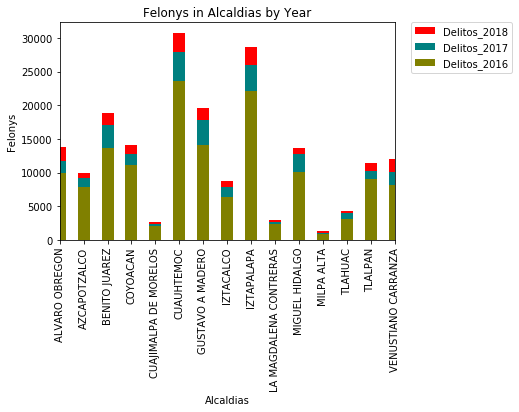

In [35]:
fig, a
ax = plt.gca()

merge_table2.plot(kind='bar',x='alcaldia_hechos',y='Delitos_2018', color='red', ax=ax)
merge_table2.plot(kind='bar',x='alcaldia_hechos',y='Delitos_2017', color='teal', ax=ax)
merge_table2.plot(kind='bar',x='alcaldia_hechos',y='Delitos_2016',color='olive', ax=ax)



plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(x='alcaldia_hechos', rotation='vertical')
plt.title("Felonys in Alcaldias by Year")
plt.xlim(0,14)
plt.xlabel("Alcaldias")
plt.ylabel("Felonys")


plt.show()

In [ ]:
count_chart = merge_table2.plot(kind='line')

In [22]:
x_axis = np.arange(2016,2019,1)
delitos_ALVARO_OBREGON = [9890,11572,16386]
delitos_AZCAPOTZALCO = [7947,9327,12026]
delitos_BENITO_JUAREZ  = [13772,17129,16386]
delitos_COYOACAN = [11248,12768,16386]
delitos_CUAJIMALPA_DE_MORELOS = [2138,2335,16386]
delitos_CUAUHTEMOC = [23819,28132,16386]
delitos_IZTACALCO  = [6353,7791,16386]
delitos_IZTAPALAPA  = [22010,25804,16386]
delitos_LA_MAGDALENA_CONTRERAS = [2425,2615,16386]
delitos_MIGUEL HIDALGO   = [10029,12810,16386]
delitos_MILPA ALTA   = [806,1071,16386]
delitos_TLAHUAC  = [3104,3904,16386]
delitos_TLALPAN = [9057,10200,16386]
delitos_VENUSTIANO_CARRANZA = [8073,9976,16386]
delitos_XOCHIMILCO = [4689,5256,16386]










SyntaxError: invalid syntax (<ipython-input-22-69207b5b7d85>, line 11)

In [ ]:
x_axis = np.arange(2016,2019,1)
delitos_ALVARO_OBREGON = [1,11572,16386]
delitos_AZCAPOTZALCO = [1,2,12026]
delitos_BENITO_JUAREZ  = [1,2,16386]
delitos_COYOACAN = [1,2,16386]
delitos_CUAJIMALPA_DE_MORELOS = [1,2,16386]
delitos_CUAUHTEMOC = [1,2,16386]
delitos_IZTACALCO  = [1,2,16386]
delitos_IZTAPALAPA  = [1,2,16386]
delitos_LA_MAGDALENA_CONTRERAS = [1,2,16386]
delitos_MIGUEL HIDALGO   = [1,2,16386]
delitos_MILPA ALTA   = [1,2,16386]
delitos_TLAHUAC  = [1,2,16386]
delitos_TLALPAN = [1,2,16386]
delitos_VENUSTIANO_CARRANZA = [1,2,16386]
delitos_XOCHIMILCO = [1,2,16386]

    
danger_h = plt.plot(x_axis,danger_drop, color = "red", label = "Danger Drop")
rail_h = plt.plot(x_axis,rail_gun, color = "green", label = "RailGun")
plt.xlabel("Coaster Runtime")
plt.ylabel("Speed (MPH)")
plt.legend(loc="higher right")
plt.ylim(0,100)
plt.title("Coaster Speed Over Time")
plt.grid()

plt.show()


In [ ]:
total_delitos_2016 = Delitos_Alcaldia_2016["delito"].sum()
total_delitos_2016

In [ ]:
total_delitos_2017 = Delitos_Alcaldia_2017["delito"].sum()
total_delitos_2017

In [ ]:
total_delitos_2018 = Delitos_Alcaldia_2018["delito"].sum()
total_delitos_2018

In [ ]:
total_delitos_2019 = Delitos_Alcaldia_2019["delito"].sum()
total_delitos_2019

In [ ]:
años_total = {"Total delitos" : {'2016':total_delitos_2016,
           '2017':total_delitos_2017,
           '2018':total_delitos_2018,
              '2019':total_delitos_2019}}

In [ ]:
años_total_df = pd.DataFrame(años_total)
años_total_df

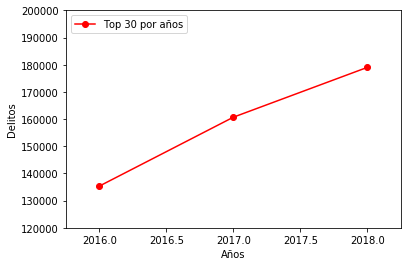

In [29]:
x_axis = np.arange(2016,2019,1)
points = [135360, 160690, 179014]
Delitos_año = plt.plot(x_axis,points, color = "red", marker ="o", label = "Top 30 por años")


plt.xlabel("Años")
plt.ylabel("Delitos")
plt.legend(loc="upper left")
plt.ylim(120000,200000)
plt.xlim(2015.75,2018.25)

plt.show()
     